# here we try to apply it to our data

In [1]:
! python --version

Python 3.6.8 :: Anaconda 4.3.0 (x86_64)


In [706]:
import yt

from astropy.io import  fits

import numpy as np

from astropy.io import ascii

import sys

In [707]:
!ls ../data/sf2outcube_COSMOSA_022.fits.gz

../data/sf2outcube_COSMOSA_022.fits.gz


In [708]:
# Filament?
hdu = fits.open("../data/sf2outcube_COSMOSA_022.fits.gz")

camwidth = (50., 'code_length')


subcube = hdu[0].data[503:557,91:153,24:93]
#subcube[18:20,18:20,18:20] = 10.
hdu[0].data = subcube
hdu.writeto("../data/tmp.fits", overwrite=True)

bounds = (0.12, 0.45)
NLAYER = 7
alpha = np.linspace(.1,1.,NLAYER)
widths =  0.0002
n_samples = 180

sigma_clip=1.
start_pos = [(69.5/2., 'code_length'), (61.5/2., 'code_length'), (125.5, 'code_length')]

outdir = "../data/movies/HDFIL1/"

ds = yt.load('../data/tmp.fits')

yt : [WARNING  ] 2019-07-26 09:58:38,299 Cannot find time
yt : [INFO     ] 2019-07-26 09:58:38,301 Detected these axes: RA---TAN DEC--TAN Wave 
yt : [WARNING  ] 2019-07-26 09:58:38,310 No length conversion provided. Assuming 1 = 1 cm.
yt : [INFO     ] 2019-07-26 09:58:38,329 Parameters: current_time              = 0.0
yt : [INFO     ] 2019-07-26 09:58:38,331 Parameters: domain_dimensions         = [69 62 54]
yt : [INFO     ] 2019-07-26 09:58:38,332 Parameters: domain_left_edge          = [0.5 0.5 0.5]
yt : [INFO     ] 2019-07-26 09:58:38,334 Parameters: domain_right_edge         = [69.5 62.5 54.5]
yt : [INFO     ] 2019-07-26 09:58:38,335 Parameters: cosmological_simulation   = 0.0


In [26]:
# HTLAB2
t = ascii.read("catalog_106.txt")
hdu = fits.open("../data/sf2outcube_COSMOSA_106.fits.gz")

ii = t['id'] == 34
r = t[ii][0]

xp,yp,zp=20,20,20

x0,x1 = r['xmin']-xp, r['xmax']+xp
y0,y1 = r['ymin']-yp, r['ymax']+yp
z0,z1 = r['zmin']-zp, r['zmax']+zp
camwidth = (50., 'code_length')



subcube = hdu[0].data[z0:z1,y0:y1,x0:x1]
#subcube[18:20,18:20,18:20] = 10.
hdu[0].data = subcube
hdu.writeto("tmp.fits", overwrite=True)

bounds = (0.12, 1.2)
NLAYER = 7
alpha = np.linspace(.1,1.,NLAYER)
widths =  0.0002
n_samples = 180

sigma_clip=.25
#start_pos = [(69.5/2., 'code_length'), (61.5/2., 'code_length'), (125.5, 'code_length')]

outdir = "../data/movies/HDLAB2/"

ds = yt.load('../data/tmp.fits')


start_pos = ds.domain_center *  (1.,1.,4.)

FileNotFoundError: [Errno 2] No such file or directory: 'catalog_106.txt'

In [ ]:
# HTLAB3
IFU = 106
ID = 58
t = ascii.read("catalog_{}.txt".format(IFU))
hdu = fits.open("data/sf2outcube_median_{}.fits.gz".format(ID))

ii = t['id'] == ID
r = t[ii][0]

xp,yp,zp=20,20,20

x0,x1 = r['xmin']-xp, r['xmax']+xp
y0,y1 = r['ymin']-yp, r['ymax']+yp
z0,z1 = r['zmin']-zp, r['zmax']+zp
camwidth = (50., 'code_length')



subcube = hdu[0].data[z0:z1,y0:y1,x0:x1]
#subcube[18:20,18:20,18:20] = 10.
hdu[0].data = subcube
hdu.writeto("tmp.fits", overwrite=True)

bounds = (0.12, 1.2)
NLAYER = 7
alpha = np.linspace(.1,1.,NLAYER)
widths =  0.0002
n_samples = 180

sigma_clip=.25
#start_pos = [(69.5/2., 'code_length'), (61.5/2., 'code_length'), (125.5, 'code_length')]

outdir = "movies/HDLAB3/"

ds = yt.load('tmp.fits')


start_pos = ds.domain_center *  (1.,1.,4.)

In [ ]:
# HTFIL2
IFU = "042"
ID = 2
t = ascii.read("catalog_{}.txt".format(IFU))
hdu = fits.open("data/sf2outcube_median_{}.fits.gz".format(IFU))

ii = t['id'] == ID
r = t[ii][0]

xp,yp,zp=[30]*3

x0,x1 = r['xmin']-xp, r['xmax']+xp
y0,y1 = r['ymin']-yp, r['ymax']+yp
z0,z1 = r['zmin']-zp, r['zmax']+zp
camwidth = (50., 'code_length')



subcube = hdu[0].data[z0:z1,y0:y1,x0:x1]
#subcube[18:20,18:20,18:20] = 10.
hdu[0].data = subcube
hdu.writeto("tmp.fits", overwrite=True)

bounds = (0.12, 1.)
NLAYER = 7
alpha = np.linspace(.15,1.,NLAYER)
widths =  0.0002
n_samples = 180

sigma_clip=.25
#sigma_clip=.5
#start_pos = [(69.5/2., 'code_length'), (61.5/2., 'code_length'), (125.5, 'code_length')]

outdir = "movies/HTFIL2/"

ds = yt.load('tmp.fits')


start_pos = ds.domain_center *  (1.,1.,4.)

In [ ]:
name = "HTFIL3"
# potentially very interesing, but could aslo justs be a diffrection spike
IFU = "043"
ID = 34
t = ascii.read("catalog_{}.txt".format(IFU))
hdu = fits.open("data/sf2outcube_median_{}.fits.gz".format(IFU))

ii = t['id'] == ID
r = t[ii][0]

xp,yp,zp=[40]*3

x0,x1 = r['xmin']-xp, r['xmax']+xp
y0,y1 = r['ymin']-yp, r['ymax']+yp
z0,z1 = r['zmin']-zp, r['zmax']+zp
camwidth = (50., 'code_length')



subcube = hdu[0].data[z0:z1,y0:y1,x0:x1]
#subcube[18:20,18:20,18:20] = 10.
hdu[0].data = subcube
hdu.writeto("tmp.fits", overwrite=True)

bounds = (0.12, .72)
NLAYER = 7
alpha = np.linspace(.15,1.,NLAYER)
widths =  0.0002
n_samples = 180

#sigma_clip=.35
sigma_clip=.5
#start_pos = [(69.5/2., 'code_length'), (61.5/2., 'code_length'), (125.5, 'code_length')]

outdir = "movies/{}/".format(name)

ds = yt.load('tmp.fits')


start_pos = ds.domain_center *  (1.,1.,4.)

In [32]:
name = "HTFIL4"
# potentially very interesing, but could aslo justs be a diffrection spike
IFU = "044"
ID = 48
field="COSMOSA"
t = ascii.read("../data/mmsf2outcube_{}_allifu.cat".format(FIELD))
hdu = fits.open("../data/sf2outcube_{}_{}.fits.gz".format(FIELD, IFU))

ii = (t['ifu'] == ID) * (t['id'] == ID)
r = t[ii][0]


xp,yp,zp= [0,0,5]

x0,x1 = 51-xp, 107+xp
y0,y1 = 23-yp, 79+yp
z0,z1 = 652-zp, 684+zp


camwidth = (50., 'code_length')

print(x0,x1)
print(y0,y1)
print(z0,z1)
camwidth = (50., 'code_length')


subcube = hdu[0].data[z0:z1,y0:y1,x0:x1]
#subcube[18:20,18:20,18:20] = 10.
hdu[0].data = subcube
hdu.writeto("tmp.fits", overwrite=True)

bounds = (0.12, .6)
NLAYER = 7
alpha = np.linspace(.15,1.,NLAYER)
widths =  0.0002
n_samples = 180

#sigma_clip=.35
sigma_clip = 1.
#start_pos = [(69.5/2., 'code_length'), (61.5/2., 'code_length'), (125.5, 'code_length')]

outdir = "movies/{}/".format(name)

ds = yt.load('tmp.fits')


start_pos =  ds.arr([14.,  25., 120.], 'code_length')

print(ds.domain_center)

IndexError: index 0 out of range for table with length 0

In [44]:
t[(t['ifu'] == ID)]

ifu,id,N,counts,flux,ra_com,dec_com,ddec,dra,x_com,y_com,z_com,dx,dy,dz,sqrt(ev1),sqrt(ev2),size2d,x_ext,y_ext,z_ext,wl_com,dwl,xmin,xmax,ymin,ymax,zmin,zmax,class,manualx,manualy,manualz,class2,comment2,use_stack,split_good,showcase,xray_counterpart
,,px,counts,erg / (cm2 s),RA[J2000],Dec[J2000],arcsec,arcsec,px,px,px,px,px,px,px,px,px,px,px,px,A,A,px,px,px,px,px,px,,,,,,,,,,
str3,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,int64,int64,int64,int64,int64,int64,str14,float64,float64,float64,str11,str135,bool,object,bool,bool
021,1,1035,4.8570e+02,2.6301e-16,150.335484,2.265315,0.9,0.8,51.39,132.72,11.73,1.78,1.67,8.32,1.80,1.66,2.45,9,6,28,3516.06,55.60,47,56,129,135,0,28,NA,nan,nan,nan,NA,N/A,False,None,False,False


In [60]:
# HTLAB1
hdu = fits.open("../data/sf2outcube_COSMOSA_022.fits.gz")
subcube = hdu[0].data[128:213,9:89,49:129]
#subcube[18:20,18:20,18:20] = 10.
hdu[0].data = subcube
hdu.writeto("../data/tmp.fits", overwrite=True)

camwidth = (50., 'code_length')


bounds = (0.15, 0.7) 
NLAYER = 7
alpha = np.linspace(.5,1.,NLAYER)
widths =  0.0002
n_samples = 180
sigma_clip = 1.5
start_pos = [(80.5/2., 'code_length'), (80.5/2., 'code_length'), (125.5, 'code_length')]

outdir = "../data/movies/HDLAB1/"

ds = yt.load('../data/tmp.fits')

start_pos = ds.domain_center *  (1.,1.,5.)

print("ds.domain_center: ", ds.domain_center)

yt : [WARNING  ] 2019-07-25 15:18:10,362 Cannot find time
yt : [INFO     ] 2019-07-25 15:18:10,364 Detected these axes: RA---TAN DEC--TAN Wave 
yt : [WARNING  ] 2019-07-25 15:18:10,367 No length conversion provided. Assuming 1 = 1 cm.
yt : [INFO     ] 2019-07-25 15:18:10,376 Parameters: current_time              = 0.0
yt : [INFO     ] 2019-07-25 15:18:10,377 Parameters: domain_dimensions         = [80 80 85]
yt : [INFO     ] 2019-07-25 15:18:10,377 Parameters: domain_left_edge          = [0.5 0.5 0.5]
yt : [INFO     ] 2019-07-25 15:18:10,378 Parameters: domain_right_edge         = [80.5 80.5 85.5]
yt : [INFO     ] 2019-07-25 15:18:10,379 Parameters: cosmological_simulation   = 0.0


ds.domain_center:  [40.5 40.5 43. ] code_length


In [271]:
hdu = fits.open("../data/sf2coutcube_{}_{}.fits.gz".format(FIELD,IFU))
map_hdu = fits.open("../data/mmap_{}_{}.fits.gz".format(FIELD,IFU))

map_hdu[0].data.max()

print( np.sum( hdu[0].data ) )
hdu[0].data[ map_hdu[0].data != ID ] = 0.
print( np.sum( hdu[0].data ) )

-449848767603.66943
32.625407556565456


In [272]:
from matplotlib import pyplot as plt
%matplotlib inline


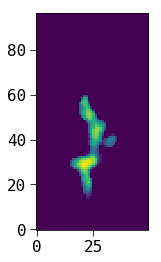

In [273]:
subcube = hdu[0].data[402:408,y0:y1,x0:x1]
plt.imshow( np.sum( subcube, axis=0), origin="bottom" )

In [460]:
# top filament
FIELD = "COSMOSC"
IFU = "025"
ID = 10018
# padding around source
xp,yp,zp=[8]*3
# center offset
xoff,yoff,zoff = 0,0,0
# camera field of view
camwidth = (30., 'code_length')
nlayer = 9
alpha = np.linspace(.1,1.,NLAYER)
widths =  0.0000001
n_samples = 180
bounds  = (0.0061, 0.025)
sigma_clip = .5
# pixal area in sq arcsec
Apix = 0.5**2.


fnspectrum = "../data/sf2outcube_{}_{}.fits.gz".format(FIELD,IFU)


In [462]:
# AGN with halo
FIELD = "COSMOSC"
IFU = "042"
ID = 5049
# padding around source
xp,yp,zp=[10]*3
# center offset
xoff,yoff,zoff = 0,0,0
# camera field of view
camwidth = (30., 'code_length')
nlayer = 9
alpha = np.linspace(.25,1.,NLAYER)
n_samples = 180
bounds  = (0.008, .1)
widths =  (bounds[1]-bounds[0])/189000.0
sigma_clip = .1
# pixal area in sq arcsec
Apix = 0.5**2.

fnspectrum = "../data/sf2outcube_{}_{}.fits.gz".format(FIELD,IFU)


In [507]:
# filament
FIELD = "COSMOSC"
IFU = "087"
ID = 5032
# padding around source
xp,yp,zp=[16]*3
# center offset
xoff,yoff,zoff = 0,0,0
# camera field of view
camwidth = (30., 'code_length')
nlayer = 9
alpha = np.linspace(.15,1.,NLAYER)
widths =  0.0000001
n_samples = 180
bounds  = (0.008, 0.02)
sigma_clip = .9
# pixal area in sq arcsec
Apix = 0.5**2.

fnspectrum = "../data/sf2outcube_{}_{}.fits.gz".format(FIELD,IFU)


In [558]:
# halo
FIELD = "COSMOSC"
IFU = "093"
ID = 10016
# padding around source
xp,yp,zp=[17]*3
# center offset
xoff,yoff,zoff = 0,0,0
# camera field of view
camwidth = (30., 'code_length')
nlayer = 9
alpha = np.linspace(.15,1.,NLAYER)
widths =  0.0000001
n_samples = 180
bounds  = (0.006, 0.025)
sigma_clip = .2
# pixal area in sq arcsec
Apix = 0.5**2.

fnspectrum = "../data/sf2outcube_{}_{}.fits.gz".format(FIELD,IFU)


In [624]:
# AGN with halo
FIELD = "COSMOSC"
IFU = "097"
ID = 5009
# padding around source
xp,yp,zp=[10]*3
# center offset
xoff,yoff,zoff = 0,0,0
# camera field of view
camwidth = (30., 'code_length')
nlayer = 9
alpha = np.linspace(.1,1.,NLAYER)
n_samples = 180
bounds  = (0.008, .12)
widths =  (bounds[1]-bounds[0])/189000.0
sigma_clip = .35
# pixal area in sq arcsec
Apix = 0.5**2.

fnspectrum = "../data/sf2nomaskoutcube_COSMOSC_097.fits.gz"


In [695]:
# halo
FIELD = "COSMOSC"
IFU = "105"
ID = 5025
# padding around source
xp,yp,zp=[17]*3
# center offset
xoff,yoff,zoff = 0,0,0
# camera field of view
camwidth = (30., 'code_length')
nlayer = 9
alpha = np.linspace(.05,1.,NLAYER)
widths =  0.0000001
n_samples = 180
bounds  = (0.008, 0.04)
sigma_clip = .2
# pixal area in sq arcsec
Apix = 0.5**2.

fnspectrum = "../data/sf2outcube_{}_{}.fits.gz".format(FIELD,IFU)


In [709]:
# filament
FIELD = "COSMOSC"
IFU = "032"
ID = 10021
# padding around source
xp,yp,zp=[13]*3
# center offset
xoff,yoff,zoff = 0,0,0
# camera field of view
camwidth = (30., 'code_length')
nlayer = 9
alpha = np.linspace(.1,1.,NLAYER)
widths =  0.0000001
n_samples = 180
bounds  = (0.0061, 0.025)
sigma_clip = .5
# pixal area in sq arcsec
Apix = 0.5**2.


fnspectrum = "../data/sf2outcube_{}_{}.fits.gz".format(FIELD,IFU)


# do the work

In [711]:
from scipy.interpolate import interp1d
import spectrum

def prep_data_source(FIELD, IFU, ID, fnspectrum, sigma_clip, xoff, yoff, zoff, ZERO_OUT_EVERYTHING_ELSE=False):
    name = "{}_{}_{}".format(FIELD, IFU, ID)

    outdir = "../movies/{}/".format(name)
    if not os.path.exists(outdir):
        os.makedirs(outdir)

    name = "ifu{}_id{:5d}".format(IFU, ID)
    t = ascii.read("../data/mmsf2outcube_{}_allifu.cat".format(FIELD))
    s = spectrum.readSpectrum(fnspectrum)
    m = spectrum.readSpectrum("../data/mmap_{}_{}.fits.gz".format(FIELD,IFU))

    # load calibration
    ftcal = "../specphot/mean_cal_{}.txt".format(field)
    tcal = ascii.read(ftcal, format="fixed_width")
    cal_interp = interp1d(tcal["wl[A]"], tcal["cal[erg/s/cm^2/A/cnt]"], kind='linear', bounds_error=False,fill_value="extrapolate")

    ww = s.grid()
    for i,w in enumerate(ww):
        s.data[i] = s.data[i] * cal_interp(w)/Apix * 1e17


    if ZERO_OUT_EVERYTHING_ELSE:
        # Null out everything but the object of interest
        s.data[ m.data != ID ] = 0.
        #sigma_clip = .15
        #bounds  = (0.00, 0.025)

    ii = (t['ifu'] == IFU) * (t['id'] == ID)
    if sum(ii) != 1:
        print("Could not find object for ifu = {} id = {}.".format(IFU,ID))
        sys.exit(0)
    r = t[ii][0]

    x0,x1 = r['xmin']-xp+xoff, r['xmax']+xp+xoff
    y0,y1 = r['ymin']-yp+yoff, r['ymax']+yp+yoff
    z0,z1 = r['zmin']-zp+zoff, r['zmax']+zp+zoff

    print("x0,x1 = ", x0,x1)
    print("y0,y1 = ", y0,y1)
    print("z0,z1 = ", z0,z1)

    subcube = s.data[z0:z1,y0:y1,x0:x1]

    print("min: ", subcube.min())
    print("max: ", subcube.max())
    print("std: ", subcube.std())

    s.hdu.data = subcube
    s.hdu.writeto(os.path.join(outdir, 'tmp.fits'), overwrite=True)

    ds = yt.load(os.path.join(outdir, 'tmp.fits'))

    start_pos = ds.domain_center *  (1.,1.,5.)

    print("ds.domain_center: ", ds.domain_center)
    
    return ds, outdir


ds, outdir = prep_data_source(FIELD, IFU, ID, fnspectrum, sigma_clip, xoff, yoff, zoff, ZERO_OUT_EVERYTHING_ELSE=False)
    

x0,x1 =  71 130
y0,y1 =  49 116
z0,z1 =  421 480
min:  -0.02301813183800704
max:  0.03056035789205799
std:  0.005457729455317079


yt : [WARNING  ] 2019-07-26 09:59:11,835 Cannot find time
yt : [INFO     ] 2019-07-26 09:59:11,837 Detected these axes: RA---TAN DEC--TAN Wave 
yt : [WARNING  ] 2019-07-26 09:59:11,841 No length conversion provided. Assuming 1 = 1 cm.
yt : [INFO     ] 2019-07-26 09:59:11,852 Parameters: current_time              = 0.0
yt : [INFO     ] 2019-07-26 09:59:11,853 Parameters: domain_dimensions         = [59 67 59]
yt : [INFO     ] 2019-07-26 09:59:11,854 Parameters: domain_left_edge          = [0.5 0.5 0.5]
yt : [INFO     ] 2019-07-26 09:59:11,855 Parameters: domain_right_edge         = [59.5 67.5 59.5]
yt : [INFO     ] 2019-07-26 09:59:11,856 Parameters: cosmological_simulation   = 0.0


ds.domain_center:  [30. 34. 30.] code_length


In [712]:
import os
if not os.path.exists(outdir):
    os.makedirs(outdir)
    
def initial_render(ds, bounds, nlayer, widths, alpha, outdir, sigma_clip):
    
    sc = yt.create_scene(ds, lens_type='perspective', field='image_0')

    # Get a reference to the VolumeSource associated with this scene
    # It is the first source associated with the scene, so we can refer to it
    # using index 0.
    source = sc[0]

    if True:
        source.set_log(False)

        # Since this rendering is done in log space, the transfer function needs
        # to be specified in log space.
        tf = yt.ColorTransferFunction(bounds)
        tf.add_layers(nlayer, w=widths, alpha=alpha, colormap='octarine')
        source.tfh.tf = tf
        source.tfh.bounds = bounds
        source.tfh.grey_opacity = True


    cam = sc.camera
    cam.focus = ds.domain_center
    cam.position = start_pos
    cam.north_vector = ds.arr([.0,  1., 0.], 'code_length')
    cam.width = camwidth
    cam.switch_orientation()

    # increase the default resolution
    cam.resolution = (800, 800)


    # set the camera to use "steady_north"

    # Plot the transfer function, along with the CDF of the density field to
    # see how the transfer function corresponds to structure in the CDF
    source.tfh.plot( os.path.join(outdir, 'transfer_function.png'), profile_field='image_0')

    sc.annotate_axes()

    # save the image, flooring especially bright pixels for better contrast
    sc.save(os.path.join(outdir, 'rendering.png'), sigma_clip=sigma_clip)
    
    return ds, sc, tf, outdir 

ds, sc, tf, outdir =  initial_render(ds, bounds, nlayer, widths, alpha, outdir, sigma_clip)


yt : [INFO     ] 2019-07-26 09:59:24,169 Adding field image_0 to the list of fields.
yt : [WARNING  ] 2019-07-26 09:59:24,170 Could not determine dimensions for field image_0, setting to dimensionless.
yt : [INFO     ] 2019-07-26 09:59:24,997 Rendering scene (Can take a while).
yt : [INFO     ] 2019-07-26 09:59:25,003 Creating volume
yt : [INFO     ] 2019-07-26 09:59:31,157 Saving render ../movies/COSMOSC_032_10021/rendering.png


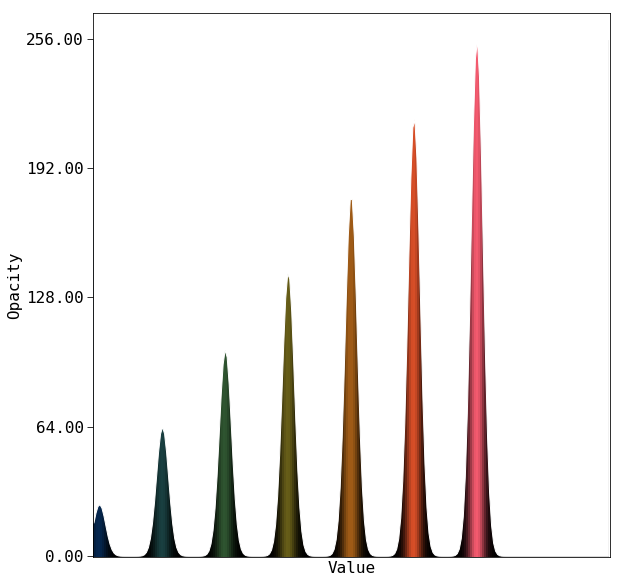

In [716]:
f = plt.figure(figsize=[10,10]) 
tf.show()


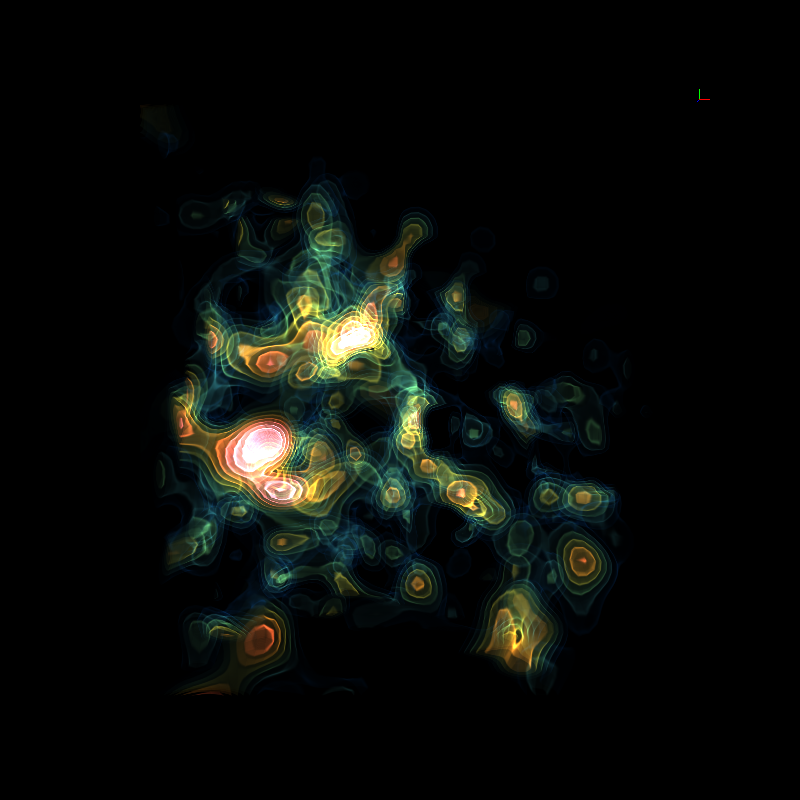

In [703]:
#sc.save(os.path.join(outdir, 'rendering.png'), sigma_clip=.1)

from IPython.display import Image
Image(os.path.join(outdir, 'rendering.png'))

In [705]:
def render_movie(sc, cam, outdir, n_samples):
    # Now create movie
    cam.steady_north = True
    source.tfh.plot(outdir + '/transfer_function.png', profile_field='image_0')


    for i in range(n_samples + 1):
        #sc.annotate_axes()

        #cam.yaw(2.*np.pi/n_samples/72., rot_center=cam.position)
        #cam.rotate(2.*np.pi/n_samples, rot_center=np.array([0.0, 0.0, 0.0]))


        #ds.domain_center
        #cam.yaw(2.*np.pi/n_samples, rot_center=np.array([(0.1,unitary)0.47647059,0.50588235] ))
        #cam.switch_orientation()
        #sc.render()
        sc.save(outdir + '/rendering{:02d}.png'.format(i), sigma_clip=sigma_clip)
        cam.steady_north = True
        cam.rotate(2.*np.pi/n_samples, rot_vector=[0.0, 1.0, 0.0], rot_center=ds.domain_center)

render_movie(sc, cam, outdir, n_samples)

yt : [INFO     ] 2019-07-25 23:23:02,004 Rendering scene (Can take a while).
yt : [INFO     ] 2019-07-25 23:23:05,326 Saving render ../movies/COSMOSC_032_10021//rendering00.png
yt : [INFO     ] 2019-07-25 23:23:05,964 Rendering scene (Can take a while).
yt : [INFO     ] 2019-07-25 23:23:09,655 Saving render ../movies/COSMOSC_032_10021//rendering01.png
yt : [INFO     ] 2019-07-25 23:23:10,292 Rendering scene (Can take a while).
yt : [INFO     ] 2019-07-25 23:23:14,201 Saving render ../movies/COSMOSC_032_10021//rendering02.png
yt : [INFO     ] 2019-07-25 23:23:14,884 Rendering scene (Can take a while).
yt : [INFO     ] 2019-07-25 23:23:18,660 Saving render ../movies/COSMOSC_032_10021//rendering03.png
yt : [INFO     ] 2019-07-25 23:23:19,300 Rendering scene (Can take a while).
yt : [INFO     ] 2019-07-25 23:23:22,579 Saving render ../movies/COSMOSC_032_10021//rendering04.png
yt : [INFO     ] 2019-07-25 23:23:23,258 Rendering scene (Can take a while).
yt : [INFO     ] 2019-07-25 23:23:27,2

In [77]:
!pwd

/Users/mxhf/ownCloudRZG/work/MPE/hetdex/src/deep_and_repeat/COSMOS/src


#  working example

yt : [INFO     ] 2019-07-25 15:21:58,268 Parameters: current_time              = 150.81659738754
yt : [INFO     ] 2019-07-25 15:21:58,269 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2019-07-25 15:21:58,269 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-07-25 15:21:58,270 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-07-25 15:21:58,271 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2019-07-25 15:21:58,272 Parameters: current_redshift          = 0.45966304374501
yt : [INFO     ] 2019-07-25 15:21:58,272 Parameters: omega_lambda              = 0.727
yt : [INFO     ] 2019-07-25 15:21:58,273 Parameters: omega_matter              = 0.273
yt : [INFO     ] 2019-07-25 15:21:58,274 Parameters: hubble_constant           = 0.702
Parsing Hierarchy : 100%|██████████| 143/143 [00:00<00:00, 12514.30it/s]
yt : [INFO     ] 2019-07-25 15:21:58,295 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2019-

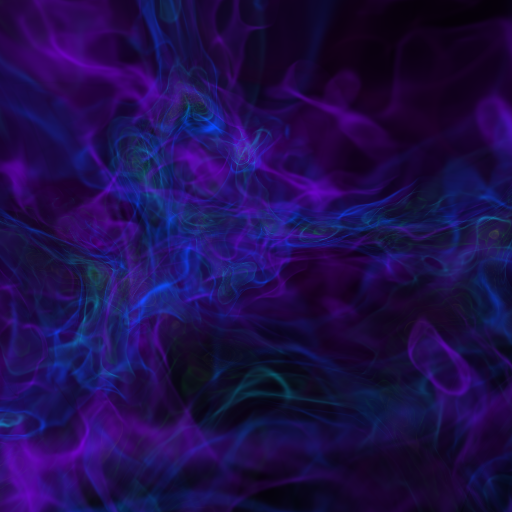

In [66]:
import yt

ds = yt.load('../yt_examples/enzo_tiny_cosmology/DD0030/DD0030')

sc = yt.create_scene(ds, lens_type='perspective')

# Get a reference to the VolumeSource associated with this scene
# It is the first source associated with the scene, so we can refer to it
# using index 0.
source = sc[0]

# Set the bounds of the transfer function
source.tfh.set_bounds((3e-31, 1e-27))

# set that the transfer function should be evaluated in log space
source.tfh.set_log(True)

# Make underdense regions appear opaque
source.tfh.grey_opacity = True

# Plot the transfer function, along with the CDF of the density field to
# see how the transfer function corresponds to structure in the CDF
source.tfh.plot('transfer_function.png', profile_field='density')

# save the image, flooring especially bright pixels for better contrast
sc.save('rendering.png', sigma_clip=6.0)


from IPython.display import Image
Image('rendering.png')

In [ ]:
dd = ds.sphere(ds.domain_center, (1., "code_length"))

dd.volume

ds.domain_center

surface = ds.surface(dd, "image_0", 1.)